# Project: Investigating European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#con">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data to be investigated in this project is European Soccer Database <br>
> This data is based on SQLite Database, it covesrs more than 25,000 matches in 11 European Countries 
> To know more about European Soccer Database, check [ Dataset on Kaggle](https://www.kaggle.com/datasets/hugomathien/soccer) <br>



> **Through investigating European Soccer Database, the following questions will be explored:** <br>
> - Which player had the most penalties?
> - Leagues performing better goals than other leagues?


In [1]:
# Importing necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sq3
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> At this step, we are going to load our tables from the SQLite database <br>
> All tables included in the database will be examined to know the relationship between them.
### General Properties

In [2]:
# create a connection to our European Soccer database
con = sq3.connect('Desktop\database.sqlite')

In [3]:
# check some meta information about the multiple tables included in the database
con.execute('select * FROM sqlite_master').fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  4,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'Player_Attributes',
  'Player_Attributes',
  11,
  'CREATE TABLE "Player_Attributes" (\n\t`id`\tINTEGER PRIMARY KEY AUTOINCREMENT,\n\t`player_fifa_api_id`\tINTEGER,\n\t`player_api_id`\tINTEGER,\n\t`date`\tTEXT,\n\t`overall_rating`\tINTEGER,\n\t`potential`\tINTEGER,\n\t`preferred_foot`\tTEXT,\n\t`attacking_work_rate`\tTEXT,\n\t`defensive_work_rate`\tTEXT,\n\t`crossing`\tINTEGER,\n\t`finishing`\tINTEGER,\n\t`heading_accuracy`\tINTEGER,\n\t`short_passing`\tINTEGER,\n\t`volleys`\tINTEGER,\n\t`dribbling`\tINTEGER,\n\t`curve`\tINTEGER,\n\t`free_kick_accuracy`\tINTEGER,\n\t`long_passing`\tINTEGER,\n\t`ball_control`\tINTEGER,\n\t`acceleration`\tINTEGER,\n\t`sprint_speed`\tINTEGER,\n\t`agility`\tINTEGER,\n\t`reactions`\tINTEGER,\n\t`balance`\tINTEGER,\n\t`shot_power`\tINTEGER,\n\t`jumping`\tINTEGER,\n\t`stamina`\tINTEGER,\n\t`strength`\tINTEGER,\n\t`long_shots`\tINTEGER,\n\t`aggr

In [4]:
# Exploring Player_Attributes Table 
Player_Attributes = pd.read_sql('select * FROM Player_Attributes', con)

In [5]:
Player_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [6]:
# Selecting first 5 rows in Player_Attributes Table 
Player_Attributes.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
# Exploring Player Table 
Player =  pd.read_sql('select * FROM Player', con)

In [8]:
# Selecting the first 5 rows in Player Table 
Player.head(5)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [9]:
# Exploring Team Table
Team = pd.read_sql('select * FROM Team', con)

In [10]:
# selecting first 5 rows in Team Table
Team.head(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [11]:
# Exploring Match Table
Match = pd.read_sql('select * FROM Match', con)

In [12]:
# Displaying all Columns of Match Table
for col in Match.columns:
    print(col)

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

In [13]:
# Selecting the first 5 rows of Match Table
Match.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [14]:
# Exploring League Table
League = pd.read_sql('select * FROM League', con)

In [15]:
# displaying table information
League.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [16]:
# displaying all the rows from League table since it is only 11 enteries 
League

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [17]:
# Exploring Country Table
Country = pd.read_sql('select * FROM Country', con)

In [18]:
# displaying table information
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [19]:
# displaying all the rows since the table is only 11 enteries 
Country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [20]:
# Exploring Team Table 
Team = pd.read_sql('select * FROM Team', con)

In [21]:
# selecting the first 5 rows in Team table 
Team.head(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [22]:
# Exploring Team_Attributes Table 
Team_Attributes = pd.read_sql('select * FROM Team_Attributes', con)

In [23]:
# Selecting the first 5 rows in Team_Attributes table
Team_Attributes.head(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover



### Data Cleaning (checking for duplicates or null Values)


In [24]:
# Tables at use will be checked for any duplicates or Null Values

In [25]:
# Checking for duplicates at player table
Player.duplicated().sum()

0

In [26]:
# Checking for nullvalues at player table
Player.isnull().sum().sum()

0

In [27]:
# Checking for duplicates at Player_Attributes table
Player_Attributes.duplicated().sum()

0

In [28]:
# Checking for nullvalues at Player_Attributes table
Player_Attributes.isnull().sum().sum()

47301

In [29]:
# dropping the null values found at Player_Attributes table
Player_Attributes.dropna(inplace=True)

# checking if the null values are removed from Player_Attributes
Player_Attributes.isnull().sum().sum()

0

In [30]:
# Checking for duplicates at Team table
Team.duplicated().sum()

0

In [31]:
# Checking for null values at Team table
Team.isnull().sum().sum()

11

In [32]:
# dropping the null values found at Team table
Team.dropna(inplace=True)

# checking if the null values are removed from Team table
Team.isnull().sum().sum()

0

In [33]:
# Checking for duplicates at Match table
Match.duplicated().sum()

0

In [34]:
# Checking for null values at Match table
Match.isnull().sum().sum()

407395

In [35]:
# dropping null values from Match table
Match.dropna(inplace=True)

#checking if the values are removed from Match table
Match.isnull().sum().sum()

0

In [36]:
# Checking for null values at League table
League.isnull().sum().sum()

0

In [37]:
# Checking for duplicates at League table
League.duplicated().sum()

0

In [38]:
# Checking for null values at Country table
Country.isnull().sum().sum()

0

In [39]:
# Checking for duplicates at Country table
Country.duplicated().sum()

0

In [40]:
# Checking for duplicates at Team table
Team.duplicated().sum()

0

In [41]:
# Checking for duplicates at Team_Attributes table
Team_Attributes.duplicated().sum()

0

In [42]:
# Checking for null values at Team_Attributes table
Team_Attributes.isnull().sum().sum()

969

In [43]:
# dropping null values from Team_Attributes table
Team_Attributes.dropna(inplace=True)

# confirming removing the null values from Team_Attributes 
Team_Attributes.isnull().sum().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> Now that the data is  trimmed and cleaned, it's time for data exploration.
> At this step, Questions posed at the beginning will be addressed here and have in depth insight about the exploration process and how we get to the conclusions presented.

### Research Question 1 (Which player had the most penalties?)

> To answer this question we need to get the name of the players from **Player** table and their penalites from **Player_Attributes** table. <br>
> And Since these data are given in separate columns from different tables , they need merging for a complete form. <br>
> SQL query will be used to do the selection of the needed columns from the different tables and join them. <br>

In [44]:
# sql query for selecting the player names and the penalites columns using joins
players_penalties = pd.read_sql('select Player.player_name, Player_Attributes.penalties, Player_Attributes.date\
                        FROM Player_Attributes\
                        JOIN Player\
                        ON Player_Attributes.player_api_id = Player.player_api_id\
                        ORDER BY  Player_Attributes.date', con )

In [45]:
# displaying first 5 rows from the quey output
players_penalties.head(5)

,player_name,penalties,date
0,Aaron Appindangoye,47.0,2007-02-22 00:00:00
1,Aaron Cresswell,29.0,2007-02-22 00:00:00
2,Aaron Doran,36.0,2007-02-22 00:00:00
3,Aaron Galindo,60.0,2007-02-22 00:00:00
4,Aaron Hughes,81.0,2007-02-22 00:00:00


In [46]:
# selecting the player of the highest penalities through idxmax method
players_penalties.loc[players_penalties.penalties.idxmax()]

player_name         Rickie Lambert
penalties                     96.0
date           2015-09-21 00:00:00
Name: 159711, dtype: object

In [47]:
# Listing the 10 largest penalities and the highlighting the largest number
players_penalties.nlargest(10, 'penalties')\
                 .style.highlight_max(color = 'lightgreen', subset = ['penalties'])

,player_name,penalties,date
159711,Rickie Lambert,96.000000,2015-09-21 00:00:00
165205,Rickie Lambert,96.000000,2015-10-23 00:00:00
169788,Rickie Lambert,96.000000,2015-12-24 00:00:00
177120,Rickie Lambert,96.000000,2016-03-10 00:00:00
16854,Andrea Pirlo,95.000000,2008-08-30 00:00:00
22113,Andrea Pirlo,95.000000,2009-02-22 00:00:00
34358,Paul Scholes,95.000000,2010-02-22 00:00:00
35317,Xavi Hernandez,95.000000,2010-02-22 00:00:00
82770,Mario Balotelli,95.000000,2013-04-26 00:00:00
84102,Mario Balotelli,95.000000,2013-05-10 00:00:00


In [48]:
# Displaying Players with largest penalties
max_penalties = players_penalties.groupby(['player_name', 'date'])['penalties'].max() \
                                 .groupby(level = 'player_name') \
                                 .nlargest(1).reset_index(level=1, drop=True) \
                                 .sort_values(ascending = False)

In [49]:
# printing out the largest scored penalties 
max_penalties

player_name             date               
Rickie Lambert          2015-09-21 00:00:00    96.0
Andrea Pirlo            2008-08-30 00:00:00    95.0
Xavi Hernandez          2010-02-22 00:00:00    95.0
Mario Balotelli         2013-04-26 00:00:00    95.0
Paul Scholes            2010-02-22 00:00:00    95.0
                                               ... 
Igor Stefanovic         2007-02-22 00:00:00    11.0
Giedrius Arlauskis      2013-09-20 00:00:00    11.0
Jakub Szumski           2013-09-20 00:00:00    11.0
Timothy van der Meulen  2007-02-22 00:00:00    10.0
Jakub Divis             2007-02-22 00:00:00     9.0
Name: penalties, Length: 10848, dtype: float64

Text(0.5, 1.0, 'Penalties Percentage')

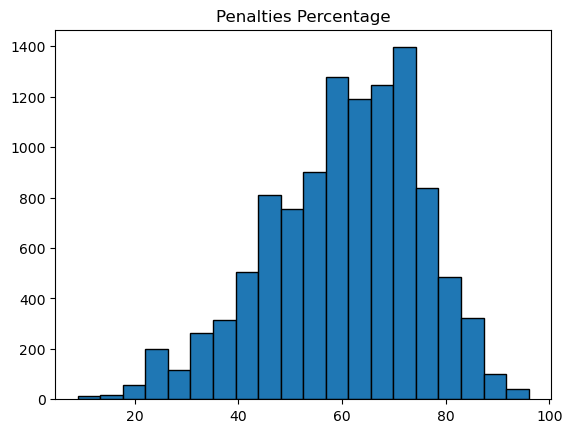

In [62]:
# plotting the largest scored penalties
max_penalties.hist(bins=20, edgecolor = 'black', grid=False)
plt.title('Penalties Percentage')

> #### Conclusion: We conclude that Rickie Lambert has the largest penalties amongest other players scoring 96

# Research Question 2 (Which League Outperformed the other leagues and scored more goals through seasons??)

> To get insights about that question, we need to get the names of the leagues and the goals scored whether at home team or away team. <br>
> Total goals (home team goals plus away team goals) can also be calculated to be used as an indicator of the performance  of a league. <br>
> For example, if the number of total goals of a league is very large compared to that of other leagues, this league has a better performance or good offensive ability.

In [51]:
# SQL Query to select home_team_goal, away_team_goal and seasons from match and leauge tables
league_goals = pd.read_sql('select Match.home_team_goal ,Match.away_team_goal , League.name as league, Match.season\
                        FROM Match\
                        JOIN League\
                        ON Match.country_id = League.country_id', con)

In [52]:
# displaying the first 24 data from the prev query grouping results by League and season
league_goals.groupby(['league', 'season'])['home_team_goal','away_team_goal'].sum().head(24)

C:\Users\JMN-UK\AppData\Local\Temp\ipykernel_11504\741887.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  league_goals.groupby(['league', 'season'])['home_team_goal','away_team_goal'].sum().head(24)


home_team_goal  away_team_goal
league                 season                                   
Belgium Jupiler League 2008/2009             499             356
                       2009/2010             308             257
                       2010/2011             382             253
                       2011/2012             421             270
                       2012/2013             375             328
                       2013/2014              18              12
                       2014/2015             376             292
                       2015/2016             402             292
England Premier League 2008/2009             532             410
                       2009/2010             645             408
                       2010/2011             617             446
                       2011/2012             604             462
                       2012/2013             592             471
                       2013/2014             598             454
                       2014/2015             560             415
                       2015/2016             567             459
France Ligue 1         2008/2009             489             369
                       2009/2010             528             388
                       2010/2011             510             380
                       2011/2012             560             396
                       2012/2013             558             409
                       2013/2014             538             395
                       2014/2015             536             411
                       2015/2016             546             414

In [53]:
# Applying aggr function to get the total sum of home team goals and away team goals for each league
league_goals.groupby('league')['home_team_goal','away_team_goal'].sum()


C:\Users\JMN-UK\AppData\Local\Temp\ipykernel_11504\3442850096.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  league_goals.groupby('league')['home_team_goal','away_team_goal'].sum()


,home_team_goal,away_team_goal
league,,
Belgium Jupiler League,2781,2060
England Premier League,4715,3525
France Ligue 1,4265,3162
Germany 1. Bundesliga,3982,3121
Italy Serie A,4528,3367
Netherlands Eredivisie,4357,3185
Poland Ekstraklasa,2678,1978
Portugal Liga ZON Sagres,2890,2311
Scotland Premier League,2607,2197


Text(0.5, 1.0, 'Percentage of Home Team Goals for All Leagues')

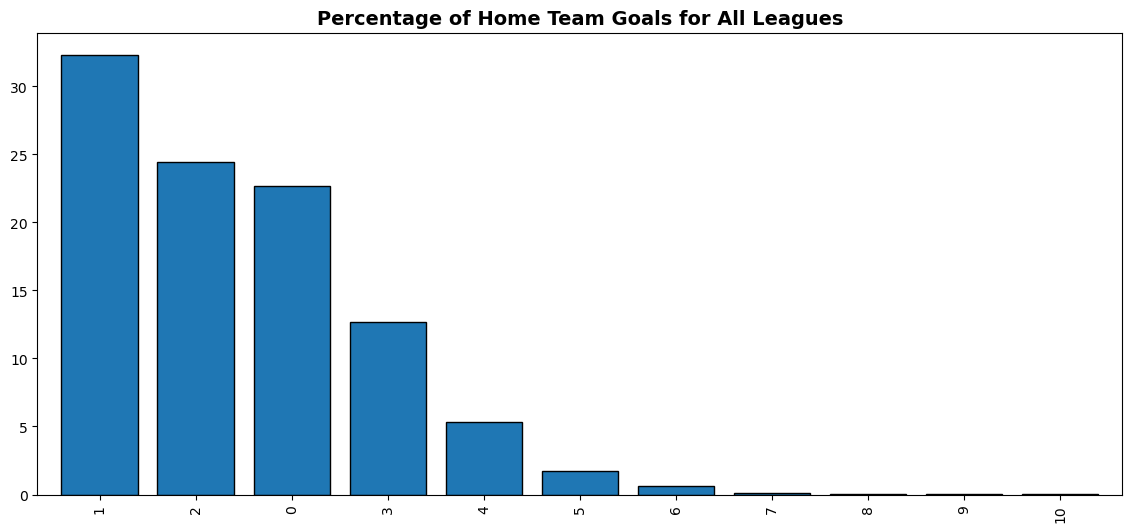

In [54]:
# Plotting the home team goal scored in all leagues 
league_goals['home_team_goal'].value_counts(normalize=True)\
                              .mul(100).plot.bar(edgecolor='black', figsize=[14,6], width=0.8)
plt.title('Percentage of Home Team Goals for All Leagues', fontsize = 14, weight = 'bold')

Text(0.5, 1.0, 'Percentage of Away Team Goals for All Leagues')

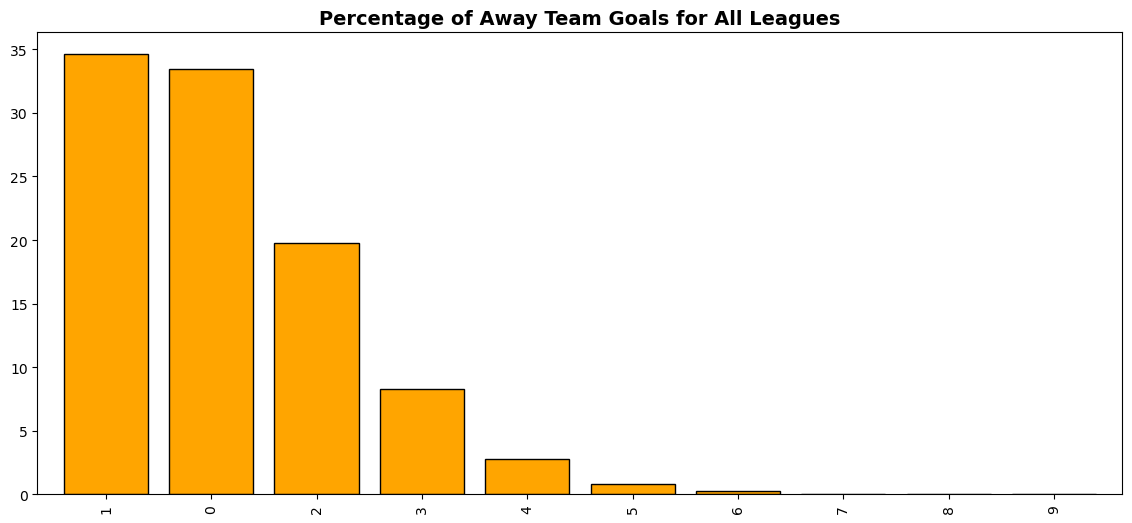

In [55]:
# Plotting the away team goal scored in all leagues 
league_goals['away_team_goal'].value_counts(normalize=True)\
                              .mul(100).plot.bar(edgecolor='black', color='orange', figsize=[14,6], width=0.8)
plt.title('Percentage of Away Team Goals for All Leagues', fontsize = 14, weight = 'bold')

In [56]:
# creating a plotting function (LeaguePlot) for Group horizontal bar plottng 
def LeaguePlot(df, grbVar, agrVar, stat= 'sum'):
    '''
    This function is created to easily plot groups data in a horizontal bar
    inputs: df(DataFrame)
            Grouping Columns (grbVar),
            Aggregating Columns (agrVar) 
            aggregating functions (stat) => Optional Argument
    Output: Horizontal Bar plottng
    
    '''
    df.groupby([grbVar])[agrVar].agg(stat).plot.barh(edgecolor='black', figsize=[14,6], width=0.8);
    # replace _ with a space for leagues names
    grbVar=grbVar.replace('_', ' ')
    # # replace _ with a space for Aggregating Column(s)
    if isinstance(agrVar, list):
        agrVar=' & '.join([x.replace("_", " ") for x in agrVar])
    else:
        agrVar=agrVar.replace('_', ' ')
        
    # Add  title format it
    plt.title(f'{stat} of {agrVar} by {grbVar}'.title(), fontsize = 14, weight = 'bold')
    # Add y labale and format it
    plt.ylabel(grbVar.title(), fontsize = 10, weight = 'bold')
    # Add x labale and format it
    plt.xlabel(f'{stat} {agrVar}'.title(), fontsize = 10, weight = 'bold')

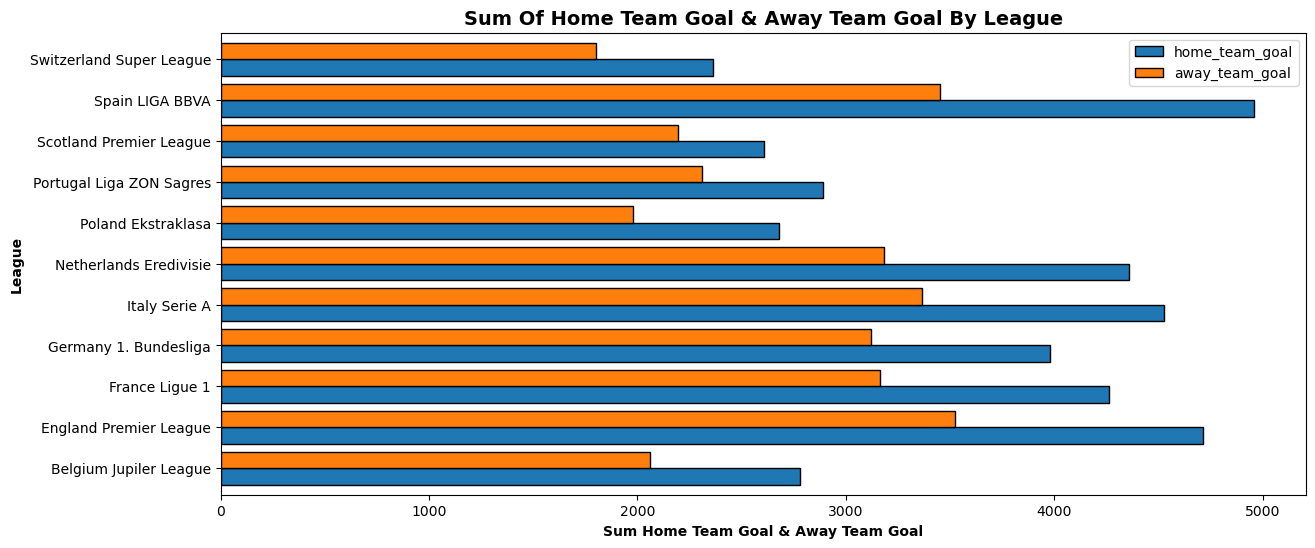

In [57]:
# calling LeaguePlot passing home_team_goal and away_team_goal arguments to visualize 
LeaguePlot(league_goals, 'league', ['home_team_goal','away_team_goal'])

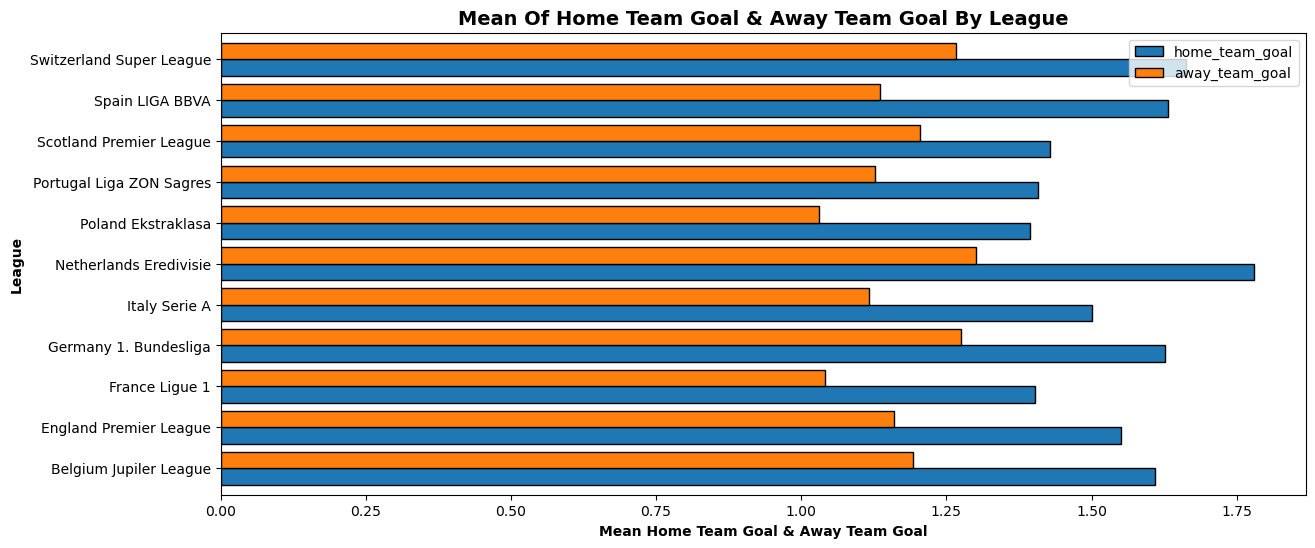

In [58]:
# calling LeaguePlot function to visualize average of home_team_goal and away_team_goal leagues goals
LeaguePlot(league_goals, 'league', ['home_team_goal','away_team_goal'], stat= 'mean'  )

In [59]:
# displaying a column for the total goals (Home team goals + away team goals)
league_goals['total_goals'] = league_goals['home_team_goal'] + league_goals['away_team_goal']

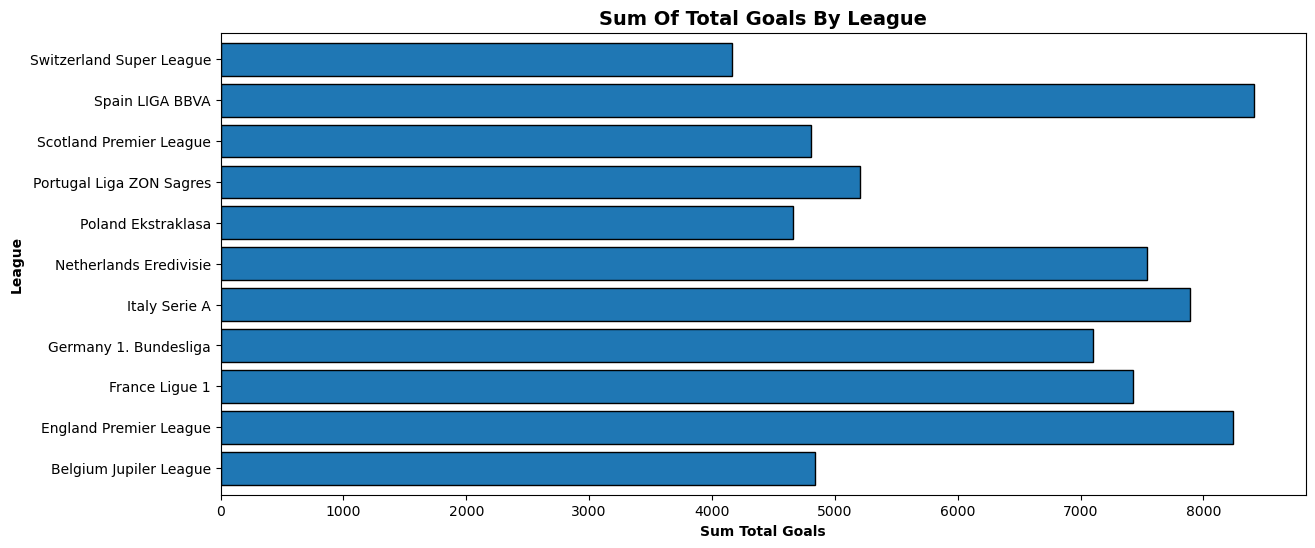

In [60]:
# calling LeaguePlot function to visualize sum of leagues total goals
LeaguePlot(league_goals, 'league', 'total_goals')

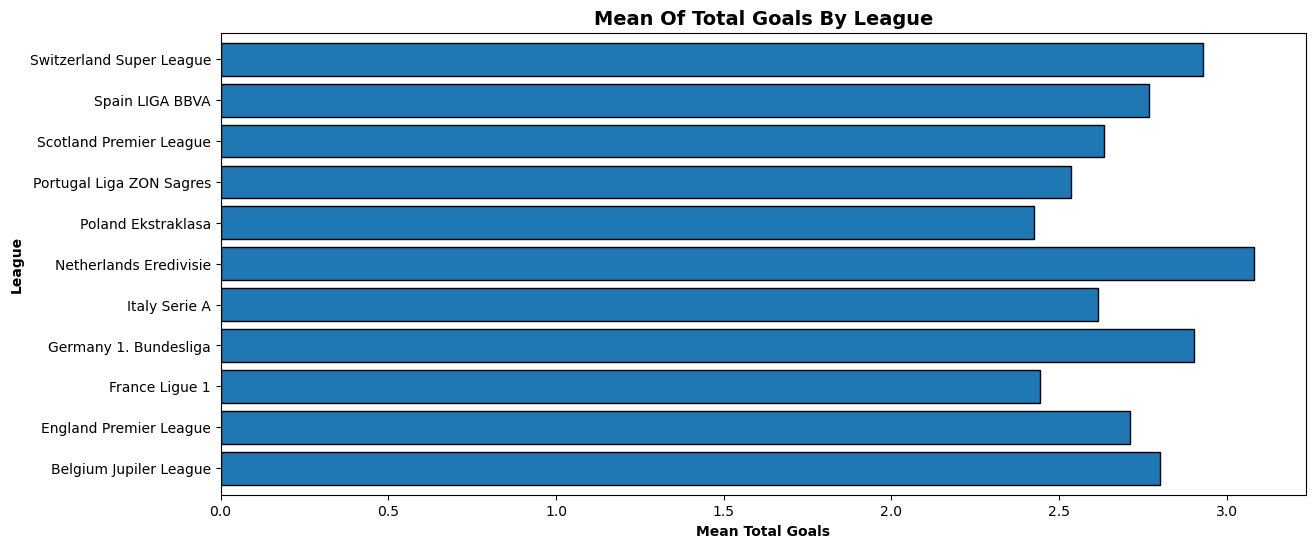

In [61]:
# calling LeaguePlot function to visualize average total goals of leagues 
LeaguePlot(league_goals, 'league', 'total_goals', stat= 'mean'  )

#### Conclusion: We conclude that Spain LIGA BBVA outperformed other leaugues considering the Goals through (2008 Till 2015) Seasons

<a id='con'></a>
## Conclusion

In this project we investigated [European Soccer Database](https://www.kaggle.com/datasets/hugomathien/soccer), containing data about 25.000+ matches from 2008 to 2016. <br>
The database is complex as it has a lot of separate tables, which could be joined to model a relational data structure.<br>
SQL Queries were used to extract data from tables into dataframed to be easily accessed, data has a lot of missing data, so through data cleaning duplicates and null values were addressed.

**In this project we analyzed:**

> - Which player had the most penalties?
> - Leagues performing better goals than other leagues?

After Applying the needed statistical analysis, we can find out that that **Rickie Lambert** has the "largest penalties" amongest other players scoring 96. <br>

We could also visualize that the “league outperformed others ” by scoring most of the goals is **Spain LIGA BBVA**. <br>

In overview, this project focused on the big picture analysis and hadn’t an intention to imply statistical inference performed in the analysis to test the significance of the results found. <br>

**But for a deeper research a suggestion to the area covered in this project can be found at:**

> - Rein R, Memmert D. Big data and tactical analysis in elite soccer: Future challenges and opportunities for sports 
science. Springerplus 2016
> - (Handbook of Statistical Methods and Analyses in Sports) Book 
> - Zhang S. Home advantage in soccer. PIT Journal 2015